In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


In [ ]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
# Determine the locations of auxiliary libraries and datasets.
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/SberHack/test-recsys/")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
    
    import sys
    sys.path.insert(0, str(AUX_DATA_ROOT))
else:
    AUX_DATA_ROOT = Path(".")

Mounted at /content/drive


In [ ]:
AUX_DATA_ROOT

PosixPath('/content/drive/My Drive/SberHack/test-recsys')

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
df = {}
import os
for dirname, _, filenames in os.walk(os.path.join(AUX_DATA_ROOT)):
    for filename in filenames:
        if 'products' in filename:
            df[filename] = pd.read_csv(os.path.join(dirname,filename))
        elif 'orders' in filename:
            orders = pd.read_csv(os.path.join(dirname,filename))
        elif 'categories' in filename:
            categories = pd.read_csv(os.path.join(dirname,filename))
        elif 'profiles' in filename:
            user_profiles = pd.read_csv(os.path.join(dirname,filename))
        elif 'properties' in filename:
            prod_props = pd.read_csv(os.path.join(dirname,filename))
        print(os.path.join(filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

tab_2_products_2020-01-01.csv
tab_2_products_2020-01-11.csv
tab_2_products_2020-01-21.csv
tab_2_products_2020-01-31.csv
tab_2_products_2020-02-10.csv
tab_2_products_2020-02-20.csv
tab_2_products_2020-03-01.csv
tab_2_products_2020-03-11.csv
tab_2_products_2020-03-21.csv
tab_2_products_2020-03-31.csv
tab_1_orders.csv
tab_4_user_profiles.csv
tab_5_product_properties.csv
tab_3_categories.csv


In [ ]:
user_profiles.head(3)

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN


In [ ]:
categories.columns = ['master_category_id', 'name', 'parent_category_id']
categories.head(3)

,master_category_id,name,parent_category_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2


In [ ]:
prod_props.head()

,product_id,property_name,property_value
0,1,Вес,100 г
1,2,Вид,Молочный напиток
2,2,Вес,100 г
3,2,Вкус,Черника
4,2,Сырье,Натуральное молоко


In [ ]:
prods = pd.concat([d for d in df.values()])
df.clear()
prods = prods[:50000]
prods

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
0,525,5354800,28381452,116.000000,4,0.00,Лазанья Золотой Петушок мясной слоеный пирог з...,37548,Золотой Петушок,101.0,99
1,525,5354800,29242911,56.990002,2,13.08,Хлеб Хлебный Дом Геркулес зерновой с отрубями ...,5636,Хлебный Дом,596.0,51
2,525,5354800,29242919,64.989998,2,40.02,Тортилья Delicados оригинальная пшеничная,22107,Delicados,596.0,51
3,525,5354800,29243785,44.990002,6,0.00,Вода питьевая минеральная BonAqua газированная...,2530,BonAqua,77.0,74
4,525,5354800,29244246,65.900002,6,30.99,"Газированный напиток Mirinda Апельсин 1,5 л",3818486,Mirinda,76.0,74
...,...,...,...,...,...,...,...,...,...,...,...
49995,150296,5563156,28850533,99.900002,1,0.00,Яблоки Роял Гала,3302524,Без бренда,91.0,90
49996,150296,5563156,28851560,48.590000,1,0.00,Сочник Аладушкин с клубникой 120 г,13468,Аладушкин,598.0,51
49997,150296,5563156,28851843,151.899994,1,0.00,Набор суповой говяжий Эколь халяль охлажденный...,4986,Эколь,120.0,119
49998,150296,5563156,28851938,832.130005,1,0.00,Корейка баранья на кости Эколь халяль охлажден...,5481632,Эколь,120.0,119


In [ ]:
prods.isna().any()

user_id               False
order_id              False
line_item_id          False
price                 False
quantity              False
discount              False
product_name           True
product_id            False
brand_name             True
master_category_id     True
parent_category_id    False
dtype: bool

In [ ]:
prods.dropna(inplace=True, axis=0)

# Log Reg

In [ ]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(prods.drop('product_id', axis = 1), 
                                                    prods.product_id, 
                                                    test_size=0.2, random_state=42)
'''

"\nfrom sklearn.model_selection import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(prods.drop('product_id', axis = 1), \n                                                    prods.product_id, \n                                                    test_size=0.2, random_state=42)\n"

In [ ]:
#X_train

In [ ]:
#print(X_train.brand_name.nunique())

In [ ]:
#y_train

# Models

In [ ]:
'''from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression(random_state=42).fit(X_train, y_train) 
y_pred = clf.predict(X_test)'''

'from sklearn.linear_model import LogisticRegression \n\nclf = LogisticRegression(random_state=42).fit(X_train, y_train) \ny_pred = clf.predict(X_test)'

In [ ]:
#print(y_pred)

In [ ]:
'''proba = clf.predict_proba(X_test)
print(proba[0].shape, clf.classes_.shape)'''

'proba = clf.predict_proba(X_test)\nprint(proba[0].shape, clf.classes_.shape)'

In [ ]:
#print(proba)

In [ ]:
'''def getKey(item):
  return item[1]

new_proba = np.zeros((proba.shape[0], 50), dtype=object)
for i in range(len(proba)):
  prod_ids = tuple(zip(clf.classes_, proba[i]))
  prod_ids = sorted(prod_ids, key=getKey, reverse=True)
  for j in range(50):
    new_proba[i][j] = prod_ids[j]'''

'def getKey(item):\n  return item[1]\n\nnew_proba = np.zeros((proba.shape[0], 50), dtype=object)\nfor i in range(len(proba)):\n  prod_ids = tuple(zip(clf.classes_, proba[i]))\n  prod_ids = sorted(prod_ids, key=getKey, reverse=True)\n  for j in range(50):\n    new_proba[i][j] = prod_ids[j]'

In [ ]:
#print(new_proba[0, :50])

# Tensor Rec

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.2


In [ ]:
pip install tensorrec  > /dev/null

ERROR: tensorflow-hub 0.9.0 has requirement six>=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: nbclient 0.5.0 has requirement jupyter-client>=6.1.5, but you'll have jupyter-client 5.3.5 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.11.0 which is incompatible.
ERROR: dm-tree 0.1.5 has requirement six>=1.12.0, but you'll have six 1.11.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
!pip install -U pyarrow > /dev/null
!pip install "dask[dataframe]" --upgrade  > /dev/null

In [ ]:
# Import the standard packages normally utilize by Data Scientist
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn import preprocessing
from collections import Counter
import scipy.sparse as sparse

# os is a handy module to explore operating system directory
import os

# import keras as the Tensorflow engine uses Keras Neural Net backend
import keras as ks

# Import Tensorrec recommendation packages
import tensorrec
from tensorrec import TensorRec
from tensorrec.eval import *
from tensorrec.util import append_to_string_at_point

### the rest of these representation graphs are also available as an alternative
### feel free to play around to tune up the model
from tensorrec.representation_graphs import (AbstractKerasRepresentationGraph, 
#                                              ReLURepresentationGraph, 
                                             NormalizedLinearRepresentationGraph, 
#                                              LinearRepresentationGraph
                                            )

from tensorrec.loss_graphs import (WMRBLossGraph, 
#                                    BalancedWMRBLossGraph,
#                                    RMSELossGraph, 
#                                    RMSEDenseLossGraph, 
#                                    SeparationDenseLossGraph
                                  ) 

from tensorrec.eval import fit_and_eval, eval_random_ranks_on_dataset
from tensorrec.util import append_to_string_at_point

### we need to construct a Keras representation graph by inheriting tensorrec.representation_graphs.AbstractKerasRepresentationGraph
### https://www.tensorflow.org/tensorboard/graphs
### many thanks to James Kirk for his article: 
### https://medium.com/hackernoon/deep-learning-for-recommendation-with-keras-and-tensorrec-2b8935c795d0

class DeepRepresentationGraph(AbstractKerasRepresentationGraph):

    # This method returns an ordered list of Keras layers connecting the user/item features to the user/item
    # representation. When TensorRec learns, the learning will happen in these layers.
    def create_layers(self, n_features, n_components):
        return [
            ks.layers.Dense(n_components * 16, activation='relu'), #rectified linear unit
            ks.layers.Dense(n_components * 8, activation='relu'), #you can try other activation layer too
            ks.layers.Dense(n_components * 2, activation='relu'), #most likely changes only benefit other ML like image recog.
            ks.layers.Dense(n_components, activation='tanh'),
        ]

Using TensorFlow backend.


In [ ]:
prods.sample(5)

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
37068,119197,5581945,28700358,41.000000,1,33.500000,Цикорий Целебник растворимый 85 г,948,Целебник,130.0,126
34908,114336,3991225,28557257,185.000000,1,0.000000,Сыр полутвердый Fine Life Эдам 40% 250 г бзмж,4274920,Fine Life,36.0,35
34577,113634,5453818,28938044,309.010010,1,109.989998,Сельдь Матиас филе оригинальное,5568,Матиас,114.0,112
34790,114056,5205530,29092595,33.990002,1,0.000000,Пюре Агуша кабачок с 4 месяцев 80 г,5476581,Агуша,141.0,139
42199,130765,3603232,28462891,90.860001,1,5.000000,Бананы,709,Без бренда,91.0,90


In [ ]:
prods.dtypes

user_id                 int64
order_id                int64
line_item_id            int64
price                 float64
quantity                int64
discount              float64
product_name           object
product_id              int64
brand_name             object
master_category_id    float64
parent_category_id      int64
dtype: object

In [ ]:
objList = prods.select_dtypes(include = "object").columns
for feat in objList:
    prods[feat] = pd.factorize(prods[feat])[0]
prods.sample(3)

,user_id,order_id,line_item_id,price,quantity,discount,product_name,product_id,brand_name,master_category_id,parent_category_id
39668,125909,5339334,28777384,187.190002,2,24.610001,2094,10049,78,222.0,221
13675,48070,5370071,28804334,34.900002,1,0.000000,870,27571,63,318.0,315
33821,111513,4304977,28466057,113.900002,1,0.000000,3872,7376,78,224.0,221


In [ ]:
prods.drop('product_name', axis=1, inplace=True, errors='ignore')

In [ ]:
prods.sample(3)

,user_id,order_id,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id
40682,128181,5398115,27951045,172.000000,1,0.0,26153,915,581.0,9
15484,53609,5609872,29197311,44.290001,1,0.0,3562688,42,21.0,20
17620,60552,4488527,28471269,169.000000,1,0.0,64641,129,610.0,19


In [ ]:
prods.head()

,user_id,order_id,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id
0,525,5354800,28381452,116.000000,4,0.00,37548,0,101.0,99
1,525,5354800,29242911,56.990002,2,13.08,5636,1,596.0,51
2,525,5354800,29242919,64.989998,2,40.02,22107,2,596.0,51
3,525,5354800,29243785,44.990002,6,0.00,2530,3,77.0,74
4,525,5354800,29244246,65.900002,6,30.99,3818486,4,76.0,74


In [ ]:
user_profiles

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN
...,...,...,...
438862,3424212,female,1997-09-15
438863,3424222,male,1978-09-18
438864,3424225,female,1981-11-02
438865,3424228,female,1993-10-04


In [ ]:
prods

,user_id,order_id,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id
0,525,5354800,28381452,116.000000,4,0.00,37548,0,101.0,99
1,525,5354800,29242911,56.990002,2,13.08,5636,1,596.0,51
2,525,5354800,29242919,64.989998,2,40.02,22107,2,596.0,51
3,525,5354800,29243785,44.990002,6,0.00,2530,3,77.0,74
4,525,5354800,29244246,65.900002,6,30.99,3818486,4,76.0,74
...,...,...,...,...,...,...,...,...,...,...
49995,150296,5563156,28850533,99.900002,1,0.00,3302524,5,91.0,90
49996,150296,5563156,28851560,48.590000,1,0.00,13468,495,598.0,51
49997,150296,5563156,28851843,151.899994,1,0.00,4986,249,120.0,119
49998,150296,5563156,28851938,832.130005,1,0.00,5481632,249,120.0,119


In [ ]:
orders

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web
...,...,...,...,...,...,...
2461953,3432957,15948419,2020-09-01 15:41:27,Лента,218,app
2461954,3432966,16855344,2020-09-17 10:16:16,Лента,130,app
2461955,3432977,9214726,2020-04-29 10:09:37,Лента,373,app
2461956,3433000,17739392,2020-09-30 09:18:19,Лента,781,undefined


In [ ]:
orders['Date'] =  pd.DatetimeIndex(orders['order_created_time'], dayfirst=True).date

In [ ]:
print(orders['Date'].min()), print(orders['Date'].max())

2019-12-31
2020-10-01


(None, None)

In [ ]:
masterdf = pd.merge(orders, prods, how = 'inner')
masterdf

,user_id,order_id,order_created_time,retailer,store_id,platform,Date,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id
0,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072526,47.590000,10,0.00,5075818,53,24.0,20
1,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072527,46.290001,10,0.00,18720,53,21.0,20
2,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072528,69.989998,1,19.91,39812,5,638.0,84
3,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072529,99.290001,2,0.00,9960,15,607.0,20
4,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072532,99.989998,1,0.00,5649,54,596.0,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28850533,99.900002,1,0.00,3302524,5,91.0,90
9943,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851560,48.590000,1,0.00,13468,495,598.0,51
9944,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851843,151.899994,1,0.00,4986,249,120.0,119
9945,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851938,832.130005,1,0.00,5481632,249,120.0,119


In [ ]:
masterdf['net_sales'] = masterdf['quantity'] * masterdf['price'] - masterdf['discount']
masterdf

,user_id,order_id,order_created_time,retailer,store_id,platform,Date,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id,net_sales
0,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072526,47.590000,10,0.00,5075818,53,24.0,20,475.900002
1,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072527,46.290001,10,0.00,18720,53,21.0,20,462.900009
2,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072528,69.989998,1,19.91,39812,5,638.0,84,50.079998
3,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072529,99.290001,2,0.00,9960,15,607.0,20,198.580002
4,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072532,99.989998,1,0.00,5649,54,596.0,51,99.989998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28850533,99.900002,1,0.00,3302524,5,91.0,90,99.900002
9943,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851560,48.590000,1,0.00,13468,495,598.0,51,48.590000
9944,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851843,151.899994,1,0.00,4986,249,120.0,119,151.899994
9945,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851938,832.130005,1,0.00,5481632,249,120.0,119,832.130005


In [ ]:
masterdf['material'] = masterdf['parent_category_id'].astype(str) + '-' + masterdf['master_category_id'].astype(str) + '-' + masterdf['retailer'].astype(str)
masterdf

,user_id,order_id,order_created_time,retailer,store_id,platform,Date,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id,net_sales,material
0,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072526,47.590000,10,0.00,5075818,53,24.0,20,475.900002,20-24.0-METRO
1,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072527,46.290001,10,0.00,18720,53,21.0,20,462.900009,20-21.0-METRO
2,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072528,69.989998,1,19.91,39812,5,638.0,84,50.079998,84-638.0-METRO
3,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072529,99.290001,2,0.00,9960,15,607.0,20,198.580002,20-607.0-METRO
4,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072532,99.989998,1,0.00,5649,54,596.0,51,99.989998,51-596.0-METRO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28850533,99.900002,1,0.00,3302524,5,91.0,90,99.900002,90-91.0-METRO
9943,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851560,48.590000,1,0.00,13468,495,598.0,51,48.590000,51-598.0-METRO
9944,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851843,151.899994,1,0.00,4986,249,120.0,119,151.899994,119-120.0-METRO
9945,150296,5563156,2020-01-04 09:24:01,METRO,83,app,2020-01-04,28851938,832.130005,1,0.00,5481632,249,120.0,119,832.130005,119-120.0-METRO


In [ ]:
import datetime as dt

now = dt.date(2020, 10, 2) # just take the max date from the index + 1
print(now)

2020-10-02


In [ ]:
## RECENCY

recency_df = masterdf.groupby('user_id').Date.max().reset_index()
recency_df.columns = ['user_id','Last Purchase']
recency_df['Recency'] = recency_df['Last Purchase'].apply(lambda x: (now - x).days)
recency_df = recency_df[['user_id', 'Recency']]
recency_df.head()

NameError: ignored

In [ ]:
# FREQUENCY

frequency_df = masterdf.groupby('user_id')['Date'].count().reset_index()
frequency_df.columns = ['user_id','Frequency']
frequency_df.head()

,user_id,Frequency
0,932,39
1,4411,12
2,4419,37
3,4649,18
4,4777,7


In [ ]:
# MONETARY

monetary_df = masterdf.groupby('user_id')['net_sales'].sum().reset_index()
monetary_df.columns = ['user_id','Monetary']
monetary_df.head()

,user_id,Monetary
0,932,8441.070005
1,4411,5136.079969
2,4419,4069.370006
3,4649,3974.479963
4,4777,2147.590044


In [ ]:
# # VARIETY

variety_df = masterdf.groupby('user_id')['material'].nunique().reset_index()
variety_df.columns = ['user_id','Variety']
variety_df.head()

,user_id,Variety
0,932,23
1,4411,7
2,4419,19
3,4649,10
4,4777,5


In [ ]:
rfmv = recency_df.copy()

rfmv = rfmv.merge(frequency_df, on='user_id')
rfmv = rfmv.merge(monetary_df, on='user_id')
rfmv = rfmv.merge(variety_df, on='user_id')
rfmv.head(5)

,user_id,Recency,Frequency,Monetary,Variety
0,932,268,39,8441.070005,23
1,4411,271,12,5136.079969,7
2,4419,273,37,4069.370006,19
3,4649,270,18,3974.479963,10
4,4777,274,7,2147.590044,5


In [ ]:
### we take the 25%, 50%, and 75% quantile for each of R, F, M, and V and store them into dictionary data type
rfmv_quantiles = rfmv.iloc[:, 1:].quantile(q = [0.25, 0.5, 0.75]).to_dict()
rfmv_quantiles

{'Frequency': {0.25: 14.5, 0.5: 24.0, 0.75: 34.5},
 'Monetary': {0.25: 2579.22500705719,
  0.5: 3846.8100080490112,
  0.75: 5792.450023651123},
 'Recency': {0.25: 270.0, 0.5: 272.0, 0.75: 273.0},
 'Variety': {0.25: 9.0, 0.5: 14.0, 0.75: 21.0}}

In [ ]:
## create a function that returns a score--0 to 4 based on the quartile ranking
## these score can be easily interpreted by the K-Mean algorithm instead of the actual value of RFMB

### recency score: the lower the recency, the higher the score 
def RecencyScore(i, col, df):
    if i <= df[col][0.25]:
        return 4
    elif i <= df[col][0.50]:
        return 3
    elif i <= df[col][0.75]: 
        return 2
    else:
        return 1
    
# F, M, V: In contrast to Recency, the higher the quantile value, the higher the score    
def FMVScore(i, col, df):
    if i <= df[col][0.25]:
        return 1
    elif i <= df[col][0.50]:
        return 2
    elif i <= df[col][0.75]: 
        return 3    
    else:
        return 4

In [ ]:
rfmv2 = rfmv.copy()

rfmv2['R_q'] = rfmv2['Recency'].apply(RecencyScore, args=('Recency', rfmv_quantiles ))
rfmv2['F_q'] = rfmv2['Frequency'].apply(FMVScore, args=('Frequency', rfmv_quantiles ))
rfmv2['M_q'] = rfmv2['Monetary'].apply(FMVScore, args=('Monetary', rfmv_quantiles ))
rfmv2['V_q'] = rfmv2['Variety'].apply(FMVScore, args=('Variety', rfmv_quantiles ))

rfmv2 = rfmv2[['user_id', 'R_q', 'F_q', 'M_q', 'V_q',]]

# # Sum total scores of each component

rfmv2['Total_Score'] = rfmv2['R_q'] + rfmv2['F_q'] + rfmv2['M_q'] + rfmv2['V_q']

rfmv2 = rfmv2[['user_id', 'Total_Score']]

# IMPORTANT: set index to customer number
rfmv2.index = rfmv2['user_id']
rfmv2 = rfmv2.drop('user_id', 1)

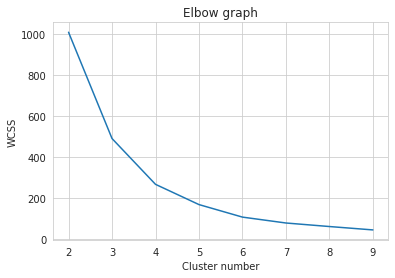

In [ ]:


# We use elbow method to find the optimal number of clusters

wcss = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, 
                    init='k-means++')
    kmeans.fit(rfmv2)
    wcss.append(kmeans.inertia_)
    
# Plot the graph for Elbow Method
plt.plot(range(2,10), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()



In [ ]:
# Apply KMean clustering using the optimal number with the "elbow" on the graph above
kmeans = KMeans(n_clusters=4, 
                init='random', 
                random_state=None)

clusters = kmeans.fit_predict(rfmv2)

### add the cluster result to the original rfmv dataframe
rfmv['Clusters'] = clusters

In [ ]:
rfmv.head(5)

,user_id,Recency,Frequency,Monetary,Variety,Clusters
0,932,268,39,8441.070005,23,2
1,4411,271,12,5136.079969,7,1
2,4419,273,37,4069.370006,19,0
3,4649,270,18,3974.479963,10,0
4,4777,274,7,2147.590044,5,3


In [ ]:
### counter is a nice function to see how many counts belong to each unique value
### in this case we want to know how may members allocated in each cluster

Counter(clusters)

Counter({0: 100, 1: 117, 2: 97, 3: 53})

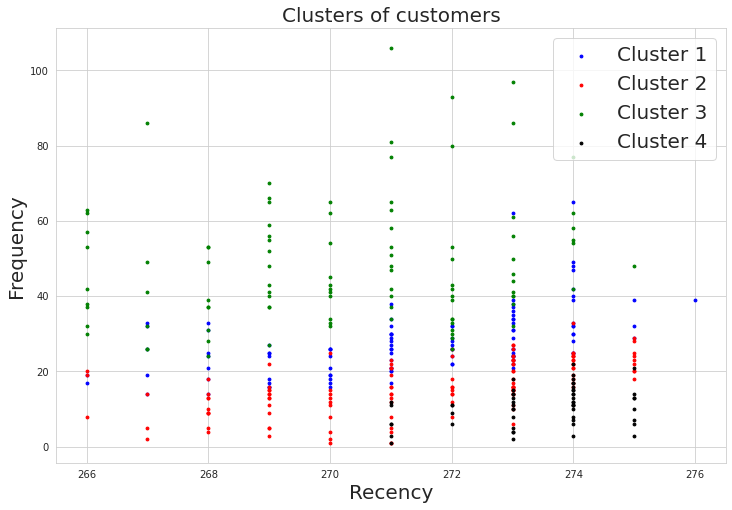

In [ ]:
## optional: plot the two components with their respective RFMV to see the shape of the clusters
## optional: you can try to plot other RFMV components too

fig, ax = plt.subplots(figsize=(12,8))

var1 = 'Recency'
var2 = 'Frequency'
temp = rfmv.copy()

c1 = temp[temp.Clusters == 0]
c2 = temp[temp.Clusters == 1]
c3 = temp[temp.Clusters == 2]
c4 = temp[temp.Clusters == 3]

# Visualization of the clusters
plt.scatter(c1[var1], c1[var2], c = 'b', label = 'Cluster 1', s=8)
plt.scatter(c2[var1], c2[var2], c = 'r', label = 'Cluster 2', s=8)
plt.scatter(c3[var1], c3[var2], c = 'g', label = 'Cluster 3', s=8)
plt.scatter(c4[var1], c4[var2], c = 'k', label = 'Cluster 4', s=8)

plt.title('Clusters of customers', size=20)
plt.xlabel(var1, size=20)
plt.ylabel(var2, size=20)
plt.legend(fontsize=20)

In [ ]:
### Depending on business use case, the rec engine may want to recommend to a certain type of customers, 
### i.e., recommend only to active customers, re-instate long-lost customers, recommend long-tailed/unpopular product etc.
### here, we will only recommend to active customers over the last year (within 365 days)

active_cust = rfmv[rfmv.Recency < 365]

In [ ]:
### merge customer features--clusters and city--into master data

cleaned_df = masterdf.merge(active_cust[['user_id','Clusters']], how='left', on='user_id')

## removed any null entries on clusters (if any)
cleaned_df = cleaned_df[cleaned_df['Clusters'].notnull()]


In [ ]:
cleaned_df.sample(2)

,user_id,order_id,order_created_time,retailer,store_id,platform,Date,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id,net_sales,material,Clusters
5606,100164,5564180,2020-01-04 10:36:51,METRO,11,web,2020-01-04,28896464,94.989998,1,70.010002,896,273,630.0,74,24.979996,74-630.0-METRO,1
4231,69172,5581344,2020-01-05 15:44:29,METRO,2,app,2020-01-05,29310181,43.610001,7,0.000000,57247,203,21.0,20,305.270004,20-21.0-METRO,2


In [ ]:

### merge sku feature--product category--into master data
cleaned_df = cleaned_df.merge(categories[['name', 'master_category_id']], how='left', 
                on='master_category_id')

In [ ]:
cleaned_df.head(2)

,user_id,order_id,order_created_time,retailer,store_id,platform,Date,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id,net_sales,material,Clusters,name
0,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072526,47.590000,10,0.0,5075818,53,24.0,20,475.900002,20-24.0-METRO,2,Творожки и десерты
1,932,5624761,2020-01-08 22:40:54,METRO,12,web,2020-01-08,29072527,46.290001,10,0.0,18720,53,21.0,20,462.900009,20-21.0-METRO,2,Йогурты


In [ ]:
len(cleaned_df), len(cleaned_df['user_id'].unique()), len(cleaned_df['material'].unique())

(9947, 367, 369)

In [ ]:
# Getting the required columns
# Get rid of unnecessary info, keep only essential columns
    
final_cleaned_df = cleaned_df

final_cleaned_df = final_cleaned_df[['name','material','quantity','user_id','Clusters',]]

# Group together to get total quantity for each customer, 
# retaining unique customer list, eliminating duplicates and redundancy
cust_grouped = final_cleaned_df.groupby(['user_id',
                                         'name',
                                         'material',
                                        'Clusters']).sum().reset_index()

In [ ]:
### Interaction Matrix 
# Getting the Customer's transaction for every material interms of sales quantity
interactions = cust_grouped.groupby(['user_id', 'material'])['quantity'].sum().unstack().fillna(0)

# Scale value of the interaction matrix using sklearn.preprocessing.MinMaxScaler 
minmaxscaler = preprocessing.MinMaxScaler()
interactions_scaled = minmaxscaler.fit_transform(interactions)
interactions_scaled = pd.DataFrame(interactions_scaled)

## The scaled matrix lost the index (customer) and column (item) information
## we re-append the customer ID and the material into the DataFrame's index and column respectively
interactions_scaled.index = interactions.index
interactions_scaled.columns = interactions.columns

In [ ]:
interactions

material,112-113.0-METRO,112-114.0-METRO,112-115.0-METRO,112-116.0-METRO,112-117.0-METRO,112-118.0-METRO,112-647.0-METRO,112-648.0-METRO,112-649.0-Ашан,112-651.0-METRO,112-653.0-METRO,112-653.0-Ашан,119-120.0-METRO,119-121.0-METRO,119-122.0-METRO,119-122.0-Ашан,119-122.0-ВкусВилл,119-123.0-METRO,119-123.0-Ашан,119-124.0-METRO,119-124.0-Ашан,119-125.0-METRO,119-125.0-Ашан,126-127.0-METRO,126-127.0-Ашан,126-128.0-METRO,126-129.0-METRO,126-130.0-METRO,139-140.0-METRO,139-141.0-METRO,139-141.0-Ашан,139-142.0-METRO,139-142.0-Ашан,139-143.0-METRO,139-143.0-Ашан,139-144.0-METRO,139-144.0-Ашан,139-145.0-METRO,139-146.0-METRO,139-146.0-Ашан,...,9-15.0-Ашан,9-16.0-METRO,9-574.0-METRO,9-574.0-Ашан,9-575.0-METRO,9-577.0-METRO,9-577.0-Ашан,9-578.0-METRO,9-578.0-Ашан,9-579.0-METRO,9-579.0-Ашан,9-580.0-METRO,9-580.0-Ашан,9-581.0-METRO,9-581.0-Ашан,9-582.0-METRO,9-582.0-Ашан,90-591.0-METRO,90-592.0-METRO,90-592.0-ВкусВилл,90-91.0-METRO,90-91.0-Ашан,90-91.0-ВкусВилл,94-95.0-METRO,94-96.0-METRO,94-97.0-METRO,94-98.0-METRO,99-101.0-METRO,99-102.0-METRO,99-102.0-Ашан,99-102.0-ВкусВилл,99-103.0-METRO,99-105.0-METRO,99-106.0-METRO,99-110.0-METRO,99-639.0-METRO,99-640.0-METRO,99-641.0-METRO,99-643.0-METRO,99-644.0-METRO
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
4649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
### User Features Matrix 
## There are two features that is used to build the user matrix here
## First is the customer's unique categories they buy 
## Second is the clusters they belong to

# Getting the unique categories they buy
# grouped them by the quantity per category
cust_qty = cust_grouped.groupby(['user_id', 'name'])['quantity'].sum().unstack().fillna(0)

# Scaled value of the categories
# Scale value of the interaction matrix using sklearn.preprocessing.MinMaxScaler 
minmaxscaler = preprocessing.MinMaxScaler()
cust_qty_scaled = minmaxscaler.fit_transform(cust_qty)
cust_qty_scaled = pd.DataFrame(cust_qty_scaled)
cust_qty_scaled.index = cust_qty.index
cust_qty_scaled.columns = cust_qty.columns

## Include the Cluster features of the customers
## this is the additional feature that we want to add into the user feature
## the cluster serves as customer's "characteristics"
### we use groupby/nunique aggregation to get a one-hot encoding of each customer's clusters

cust_clus = cust_grouped.groupby(['user_id', 'Clusters'])['Clusters'].nunique().unstack().fillna(0)
cust_clus

# Merge the two features to create the user feature matrix
customer_features = pd.merge(cust_qty_scaled, cust_clus, left_index=True, right_index=True, how='inner')
customer_features = customer_features.rename(columns={0: 'Cluster 0', 
                                                      1: 'Cluster 1', 
                                                      2: 'Cluster 2', 
                                                      3: 'Cluster 3', 
                                                      4: 'Cluster 4'})

## as an additional practice, you can also include other user information from custdf, such as gender and date of birth
## but for now, I will omit those information

In [ ]:
### Item Features Matrix
## We use the different categories of the items as the feature to build the item feature matrix here

item_category = pd.DataFrame(cust_grouped.groupby(['material', 
                                              'name'])['quantity'].sum().unstack().fillna(0).reset_index().set_index('material'))
# item_cat = item_cat.applymap(replaceneg0)

# Scaled value of the item categories
minmaxscaler = preprocessing.MinMaxScaler()
item_category_scaled = minmaxscaler.fit_transform(item_category)
item_category_scaled = pd.DataFrame(item_category_scaled)
item_category_scaled.index = item_category.index
item_category_scaled.columns = item_category.columns

In [ ]:
### We have three features as required by TensorRec
### TensorRec accept matrix, and not dataframe, therefore we need to transform them into matrix

## Create COOMatrices using Scipy function 
## COOMatrices are sparse matrices, mostly filled with zero
## It speeds up the processes and saves a lot of memory
interaction_f = sparse.coo_matrix(interactions_scaled)
user_f  = sparse.coo_matrix(customer_features) 
item_f  = sparse.coo_matrix(item_category_scaled)

In [ ]:
### Jesse Steinweg-Woods provide a great elaboration on Recommendation metrics
### The following code is borrowed from his work
### https://jessesw.com/Rec-System/

def interaction_masking(interactions):
    '''
    This function will "mask" (a.k.a "hide") 20% of original interactions
    Masked items wil be considered not purchased

    '''
    mask_size = len(interactions.data)
    mask = np.random.choice(a=[False, True], size=mask_size, p=[.2, .8])
    not_mask = np.invert(mask)

    train_interactions = sparse.coo_matrix((interactions.data[mask],
                                        (interactions.row[mask],
                                         interactions.col[mask])),
                                       shape=interactions.shape)

    test_interactions = sparse.coo_matrix((interactions.data[not_mask],
                                       (interactions.row[not_mask],
                                        interactions.col[not_mask])),
                                      shape=interactions.shape)

    return train_interactions, test_interactions

In [ ]:
mask_size = len(interaction_f.data)

### use numpy.random.choice to generate a random True/False array, where False denotes the "masked" interactions (hidden)
## https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.choice.html
np.random.choice(a=[False, True], 
                 size=mask_size, 
                 p=[.2, .8])

array([ True,  True, False, ...,  True, False,  True])

In [ ]:
# Create a masked train and test dataset of the interaction features
train_interactions, test_interactions = interaction_masking(interaction_f)

# Feed the user and item features
user_features  = user_f
item_features = item_f

In [ ]:
train_interactions

<367x369 sparse matrix of type '<class 'numpy.float64'>'
	with 4536 stored elements in COOrdinate format>

In [ ]:
print(tf.__version__)

1.15.2


In [ ]:
%%time
### call %%time to see the time it takes to run the model 

## model parameters

epochs = 100 #number of iterations ## play around with this number to achieve an optimal learning curve
alpha = 0.01 
n_components =  10 ## play around with this number to achieve an optimal learning curve

verbose = True
learning_rate = 1e-5
n_sampled_items = int(item_features.shape[0] * .1)
biased = False
 
## Approximation of WMRB: Learning to Rank in a Scalable Batch Training Approach .
### Interactions can be any positive values, but magnitude is ignored. Negative interactions are ignored
### http://ceur-ws.org/Vol-1905/recsys2017_poster3.pdf
#  Options: BalancedWMRBLossGraph,RMSELossGraph, RMSEDenseLossGraph, SeparationDenseLossGraph

model = TensorRec(n_components = n_components,                 
                  user_repr_graph = DeepRepresentationGraph(),
                   item_repr_graph = NormalizedLinearRepresentationGraph(),
                   loss_graph = WMRBLossGraph(), 
                  biased=biased)

model.fit(train_interactions, 
          user_features, 
          item_features, 
          epochs=epochs, 
          verbose=False, 
          alpha=alpha, 
          n_sampled_items=n_sampled_items,
          learning_rate=learning_rate)


# # Get predicted scores for all users and all items
predictions = model.predict(user_features=user_features,
                             item_features=item_features)

# Get the predicted rankings (First, second, third, and so forth...) for all users and all items
predicted_ranks = model.predict_rank(user_features=user_features,
                                     item_features=item_features)

/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


CPU times: user 6.26 s, sys: 155 ms, total: 6.41 s
Wall time: 5.41 s


In [ ]:
%%time

### TESTING

# we use Recall@k
# Recall@k: for the average user, what percentage of their test items made it in to the top k in the predicted rankings

# in other words, recall@k:
# what percentage of the positively interacted items (items purchased) were in the top k results of the prediction?

# in simpler words:
# Recall@k = (# of recommended items @k that are relevant) / (total # of relevant items)
#a.k.a
# Recall@k = (# of recommended items @k ) / (total # items purchased)

### reference: 

## optimally, if you have around 400-500 products, you want to achieve recall at k ≈ 200-250
## but since we only have 92 products, k=80 may sounds fitting.
r_at_k_test = recall_at_k(predicted_ranks, test_interactions, k=50)
r_at_k_train = recall_at_k(predicted_ranks, train_interactions, k=50)
print("Recall at @k: Train: {:.2f} Test: {:.2f}".format(r_at_k_train.mean(), r_at_k_test.mean()))

Recall at @k: Train: 0.12 Test: 0.12
CPU times: user 7.45 ms, sys: 18 µs, total: 7.47 ms
Wall time: 7.47 ms


In [ ]:
# produce the ranking into a readable table (dataframe it is)
ranks_df = pd.DataFrame(predicted_ranks)
ranks_df.columns = item_category_scaled.index
ranks_df.index = customer_features.index

In [ ]:
ranks_df

material,112-113.0-METRO,112-114.0-METRO,112-115.0-METRO,112-116.0-METRO,112-117.0-METRO,112-118.0-METRO,112-647.0-METRO,112-648.0-METRO,112-649.0-Ашан,112-651.0-METRO,112-653.0-METRO,112-653.0-Ашан,119-120.0-METRO,119-121.0-METRO,119-122.0-METRO,119-122.0-Ашан,119-122.0-ВкусВилл,119-123.0-METRO,119-123.0-Ашан,119-124.0-METRO,119-124.0-Ашан,119-125.0-METRO,119-125.0-Ашан,126-127.0-METRO,126-127.0-Ашан,126-128.0-METRO,126-129.0-METRO,126-130.0-METRO,139-140.0-METRO,139-141.0-METRO,139-141.0-Ашан,139-142.0-METRO,139-142.0-Ашан,139-143.0-METRO,139-143.0-Ашан,139-144.0-METRO,139-144.0-Ашан,139-145.0-METRO,139-146.0-METRO,139-146.0-Ашан,...,9-15.0-Ашан,9-16.0-METRO,9-574.0-METRO,9-574.0-Ашан,9-575.0-METRO,9-577.0-METRO,9-577.0-Ашан,9-578.0-METRO,9-578.0-Ашан,9-579.0-METRO,9-579.0-Ашан,9-580.0-METRO,9-580.0-Ашан,9-581.0-METRO,9-581.0-Ашан,9-582.0-METRO,9-582.0-Ашан,90-591.0-METRO,90-592.0-METRO,90-592.0-ВкусВилл,90-91.0-METRO,90-91.0-Ашан,90-91.0-ВкусВилл,94-95.0-METRO,94-96.0-METRO,94-97.0-METRO,94-98.0-METRO,99-101.0-METRO,99-102.0-METRO,99-102.0-Ашан,99-102.0-ВкусВилл,99-103.0-METRO,99-105.0-METRO,99-106.0-METRO,99-110.0-METRO,99-639.0-METRO,99-640.0-METRO,99-641.0-METRO,99-643.0-METRO,99-644.0-METRO
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
932,207,364,234,62,183,213,248,212,208,170,59,60,290,154,194,192,193,45,46,199,200,347,348,299,300,157,253,50,268,41,42,140,141,214,215,32,31,88,354,353,...,285,333,117,116,128,185,184,250,251,232,233,260,261,349,350,111,112,145,230,231,103,102,104,22,244,58,153,155,196,197,198,64,171,303,71,265,48,216,209,273
4411,231,335,195,91,162,239,116,238,232,318,14,13,236,263,296,298,297,159,160,299,300,347,348,341,342,85,260,39,201,143,144,130,131,75,76,69,68,5,353,352,...,326,287,41,42,173,203,204,138,139,330,331,254,255,311,312,37,38,112,205,206,121,122,123,19,165,146,119,258,44,45,46,216,101,343,150,189,16,179,240,264
4419,214,320,194,38,233,206,124,205,215,230,27,26,168,73,275,276,277,59,60,110,111,367,368,312,313,150,339,173,290,127,128,143,144,99,100,181,180,74,363,362,...,330,228,131,132,188,90,89,292,293,286,287,222,223,354,355,139,140,235,174,175,198,196,197,39,179,37,119,191,219,220,221,85,75,333,63,182,58,147,167,311
4649,99,79,7,29,348,294,57,293,100,365,120,119,23,242,305,306,307,88,89,359,360,257,258,323,324,30,116,289,68,254,253,128,127,15,16,231,232,56,101,102,...,341,156,41,42,188,147,146,185,186,337,338,219,218,243,244,47,48,250,58,59,279,280,281,284,292,55,228,361,69,70,71,194,96,167,117,65,3,17,122,200
4777,76,347,245,86,153,316,29,317,77,217,85,84,206,304,108,106,107,287,288,101,102,225,226,135,134,345,333,167,353,137,138,25,26,197,198,43,42,139,335,334,...,193,178,342,343,215,172,173,165,166,41,40,282,283,228,229,234,233,55,181,180,204,203,205,58,289,186,192,148,250,251,252,272,30,230,83,337,247,159,349,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148547,212,238,252,146,94,194,33,193,211,267,6,5,110,200,299,300,301,286,287,57,58,350,351,315,316,261,361,176,330,278,279,161,162,91,92,239,240,30,355,354,...,297,70,153,152,213,77,76,218,219,306,307,149,148,258,259,133,134,165,117,118,232,233,234,62,74,210,155,139,113,114,115,285,23,363,164,214,183,179,274,305
148898,91,48,36,55,340,327,52,326,92,367,45,44,17,282,264,265,263,209,210,348,349,276,277,312,313,27,111,233,123,291,290,110,109,6,7,240,241,20,80,81,...,323,144,24,25,102,217,218,105,104,352,353,138,137,157,156,28,29,259,34,35,314,315,316,239,200,75,226,339,70,71,72,281,57,249,227,140,16,9,182,116
148997,135,59,35,91,344,300,56,301,136,358,143,142,36,221,317,318,319,166,167,334,333,275,276,213,214,24,204,287,119,209,210,90,89,1,2,325,326,23,105,106,...,308,94,38,37,184,187,188,80,81,348,349,84,83,10

In [ ]:
epochs = 500
fit_kwargs = {'epochs': 1, 'alpha': 0.01, 'verbose': True, 'learning_rate': 1e-5,
              'n_sampled_items': int(item_features.shape[0] * .1)}

test_model = TensorRec(n_components = 10,                 
                  user_repr_graph = DeepRepresentationGraph(),
                   item_repr_graph = NormalizedLinearRepresentationGraph(),
                   loss_graph = WMRBLossGraph(), 
                  biased=False)

In [ ]:
from tqdm import tqdm
def f1_measure(rec, pres):
  return 2 * rec * pres / (rec + pres)

def train_and_test():
  prec = []
  rec = []
  f1 = []
  for epoch in tqdm(range(epochs)):
      test_model.fit_partial(interactions=train_interactions,
                        user_features=user_features,
                        item_features=item_features,
                        **fit_kwargs)
      predicted_ranks = test_model.predict_rank(user_features=user_features,
                                      item_features=item_features)
      
      p_at_k_test = precision_at_k(predicted_ranks, test_interactions, k=50)
      r_at_k_test = recall_at_k(predicted_ranks, test_interactions, k=50)
      prec.append(p_at_k_test.mean() * 100)
      rec.append(r_at_k_test.mean())
      # f1.append(f1_measure(r_at_k_test.mean(), p_at_k_test.mean()))
  return prec, rec, f1

In [ ]:
prec, rec, f1 = train_and_test()

  0%|          | 0/500 [00:00<?, ?it/s]/tensorflow-1.15.2/python3.6/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
100%|██████████| 500/500 [35:52<00:00,  4.30s/it]


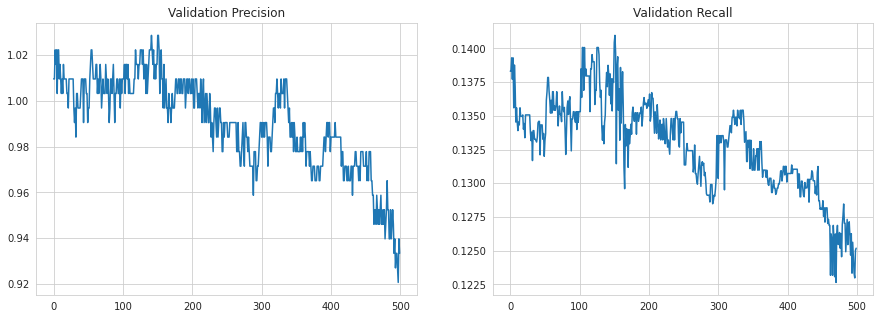

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.set_title('Validation Precision')
ax2.set_title('Validation Recall')
x = np.arange(epochs)
ax1.plot(x, prec)
ax2.plot(x, rec)